## Scikit Learn

### 선형 회귀를 scikit-learn 라이브러리로 구현

In [1]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

regr = linear_model.LinearRegression()

In [2]:
X = [[164], [179], [162], [170]]  # 다중회귀에도 사용하도록 함 
#X = np.array([[164], [179], [162], [170]])  
y = [53, 63, 55, 59]           # y = f(X)의 결과 

### 선형 회귀 학습결과 확인 및 예측

In [3]:
regr.fit(X, y)

LinearRegression()

In [4]:
coef = regr.coef_               # 직선의 기울기
intercept = regr.intercept_     # 직선의 절편
score = regr.score(X, y)        # 학습된 직선이 데이터를 얼마나 잘 따르나

print("y =", coef, "* X + ", intercept)
print("The score of this line for the data: ", score)

y = [0.55221745] * X +  -35.686695278969964
The score of this line for the data:  0.903203123105647


In [5]:
input_data = [[180], [185]]

### 선형회귀로 예측: 키와 몸무게의 상관관계

In [6]:
result = regr.predict(input_data)
print(result)       # 몸무게 예측

[63.71244635 66.47353362]


In [7]:
# 키가 169인 학생의 몸무게 예측
regr.predict([[169]])

array([57.63805436])

[54.8769671  63.1602289  53.77253219 58.19027182]


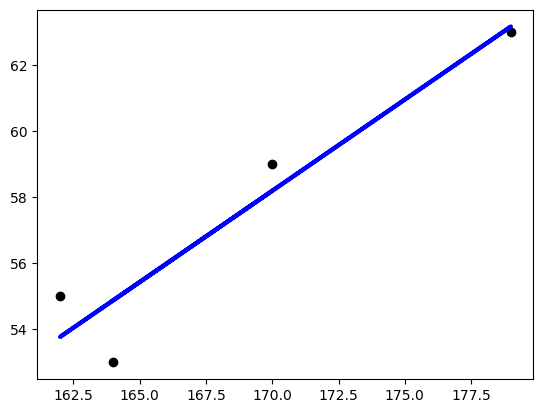

In [8]:
# 키와 몸무게의 상관관계를 그래프로 표현
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
 
regr = linear_model.LinearRegression() 
 
X = [[164], [179], [162], [170]]  # 선형회귀의 입력은 2차원으로 만들어야 함
y = [53, 63, 55, 59]     # y = f(X)의 결과값
regr.fit(X, y)

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X, y, color='black')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = regr.predict(X)
print(y_pred)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show()

### LAB1 다차원 선형회귀

In [9]:
import numpy as np 
from sklearn import linear_model 
 
regr = linear_model.LinearRegression() 

# 남자는 0, 여자는 1
X = [[164, 1], [167, 1], [165, 0], [170, 0], [179, 0], [163, 1], [159, 0], [166, 1]]  # 입력데이터 2차원 
y = [43, 48, 47, 66, 67, 50, 52, 44]     # y 값은 1차원 데이터
regr.fit(X, y)          

print('계수 :', regr.coef_ )
print('절편 :', regr.intercept_)
print('점수 :', regr.score(X, y))
print('은지와 동민이의 추정 몸무게 :', regr.predict([[166, 1], [166, 0]]))

계수 : [ 0.88542825 -8.87235818]
절편 : -90.97330367074522
점수 : 0.7404546306026769
은지와 동민이의 추정 몸무게 : [47.13542825 56.00778643]


### 당뇨병 예제와 학습 데이터 생성

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn import datasets 
 
# 당뇨병 데이터 세트를 sklearn의 데이터집합으로부터 읽는다. 
diabetes = datasets.load_diabetes()

In [11]:
print('입력데이터의 특성들')
print(diabetes.feature_names)

입력데이터의 특성들
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [12]:
print('shape of diabetes.data: ', diabetes.data.shape)
print(diabetes.data)

shape of diabetes.data:  (442, 10)
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [13]:
print('target data y:', diabetes.target.shape)
print(diabetes.target)

target data y: (442,)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91.

In [14]:
X = diabetes.data[:, 2]
print(X)

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [15]:
X = diabetes.data[:, np.newaxis, 2]
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [16]:
# newaxis를 이용한 배열의 차원 증가
A = np.array([1, 2, 3])
print(A)
print(A.shape)

B = A[:, np.newaxis]
print(B)
print(B.shape)

C = A[np.newaxis, :]
print(C)
print(C.shape)

[1 2 3]
(3,)
[[1]
 [2]
 [3]]
(3, 1)
[[1 2 3]]
(1, 3)


### 체질량지수bmi와 당뇨수치의 상관관계

In [17]:
regr.fit(X, diabetes.target)         # 학습을 통한 선형회귀 모델을 생성 
print(regr.coef_, regr.intercept_)

[949.43526038] 152.1334841628967


In [18]:
# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)

In [19]:
# 학습 데이터와 테스트 데이터를 분리한다. (BMI 열만 학습에 사용하는 경우) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data[:, np.newaxis,2], diabetes.target, test_size=0.2) 
regr = LinearRegression() 
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

[916.34573487] 151.95496842169817


In [20]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.3152041163341758
0.44025249411276635


### 당뇨병 예제의 학습 및 테스트 데이터 구분

In [21]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.    target, test_size=0.2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)     # 테스트 데이터로 예측해보자.

In [22]:
score = regr.score(X_train, y_train)
print(score)
score = regr.score(X_test, y_test)
print(score)

0.518239644844575
0.48980143349110494


In [23]:
print(y_pred)
print(y_test)

[129.90416911 168.39870271 183.56770963 142.90586347 148.90711465
  77.41367145  94.16299879 147.21220095 170.47344959 178.94056481
  93.80348342 138.85188903  59.04604479 118.25863935 135.57378521
 115.31385979 176.47077684 219.12652961 174.03020782 134.31418728
 109.36161285 120.00498119 163.4212761  260.81577013 179.05879345
  98.94628309 270.06175734 151.27487449 120.89242278 231.69508468
 162.37213509 136.31192113 166.88930667 222.66718604  85.6937139
 189.36986243  92.92485147 176.58048207 246.38791641 234.26988904
 106.54487994 107.14001272 255.26834961  51.09151415 150.5970194
 219.14464198 159.90491718 155.51839379 263.423266   245.60549949
 111.65005319 173.88873283 124.64297677  93.67793913  43.86243151
 159.13227978 199.47333609 185.88396888 142.60480787 204.67625861
 220.44103603 152.61030217 205.75862056 186.1698554  232.31658172
 207.30989242 112.95855813 164.63729693 119.08709873 248.90793074
 132.74948352 164.68412092 180.05002159 166.21581564 163.53608484
 210.9884478

### LAB 1 데이터 80%로 학습하여 예측한 결과와 실제 데이터 비교

[  11.44103391 -245.65107576  481.66324262  383.07873178 -902.05542398
  628.75193891  138.08891947  132.11638374  794.95110797   54.35821151] 151.11421905369318


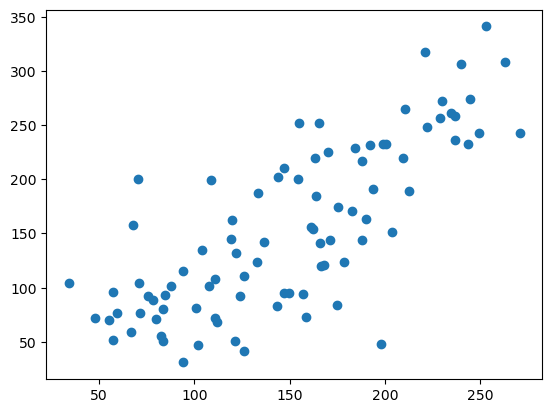

In [24]:
import numpy as np 
from sklearn import linear_model  # scikit-learn 모듈을 가져온다
from sklearn import datasets
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression() 

# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2) 
regr.fit(X_train, y_train)
print(regr.coef_, regr.intercept_)

y_pred = regr.predict(X_test)

plt.scatter(y_pred, y_test)
plt.show()

#print('Mean squared error:', mean_squared_error(y_test, y_pred))

### 알고리즘이 갖는 오차

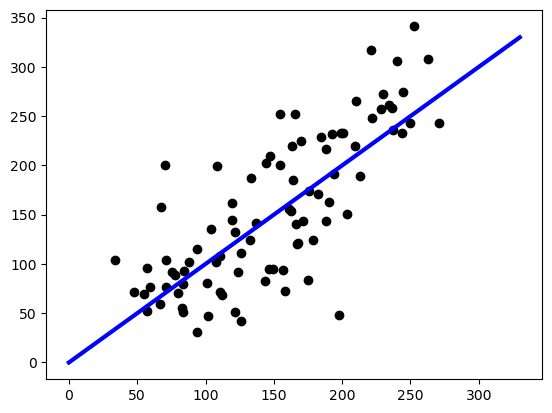

In [25]:
plt.scatter(y_pred, y_test,  color='black')

x = np.linspace(0, 330, 100)  # 특정 구간의 점 
plt.plot(x, x, linewidth = 3, color = 'blue')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error

... # 이전 절에서 구한 선형회귀 모델의 코드를 삽입함

print('Mean squared error:', mean_squared_error(y_test, y_pred))

Mean squared error: 2405.561061322773


### 붓꽃 분류

In [27]:
from sklearn.datasets import load_iris 
iris = load_iris() 
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [28]:
iris.data.shape

(150, 4)

### Iris 데이터 분석

In [29]:
print(iris.feature_names) # 4개의 특징 이름을 출력한다.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [30]:
# 정수는 꽃의 종류를 나타낸다.: 0 = setosa, 1=versicolor, 2=virginica 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### k-NN 알고리즘 적용

In [31]:
# (80:20)으로 분할한다. 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 

iris = load_iris() 
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

num_neigh = 5
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
scores = metrics.accuracy_score(y_test, y_pred) 
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 5일때 정확도: 0.933


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 새로운 꽃으로 모델을 통한 분류

In [33]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
 
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = num_neigh) 
#knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(iris.data, iris.target) 

KNeighborsClassifier()

In [34]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 아직 보지 못한 새로운 데이터를 제시해보자. 
X = [[3,4,5,2], [5,4,2,2]] 
y = knn.predict(X) 
 
print(classes[y[0]]) 
print(classes[y[1]]) 

versicolor
setosa


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}'.format(num_neigh, scores))

n_neighbors가 5일 때 정확도: 0.967


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  2., 48.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7ff5f89c1520>)

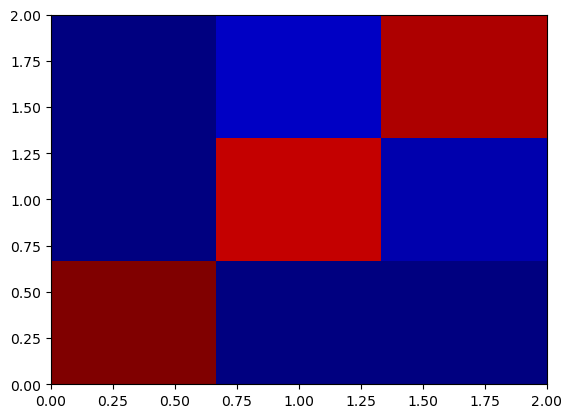

In [36]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
#plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)

In [37]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

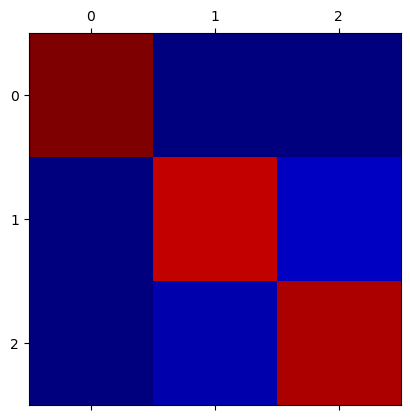

In [38]:
#plt.matshow(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.jet)

### 기대 수명 예측

In [39]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import seaborn as sns

In [40]:
life = pd.read_csv("/content/drive/MyDrive/강의5 파이썬과데이터과학/코드1/life_expectancy.csv")
print(life.head())
print(life.shape)
print(life.dtypes)

NameError: name 'pd' is not defined

In [41]:
life = life[['Life expectancy', 'Year', 'Alcohol', 
             'Percentage expenditure', 'Total expenditure', 
             'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 
             'Thinness 1-19 years', 'Thinness 5-9 years']]
print(life)

NameError: name 'life' is not defined

In [42]:
print(life.shape)
print(life.isnull().sum())

NameError: name 'life' is not defined

In [43]:
life.dropna(inplace = True)
print(life.shape)

NameError: name 'life' is not defined

In [44]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = life.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

NameError: name 'sns' is not defined

In [45]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 
             'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

NameError: name 'sns' is not defined

In [46]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

NameError: name 'life' is not defined

In [47]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)
y_test_predict = lin_model.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 1.0


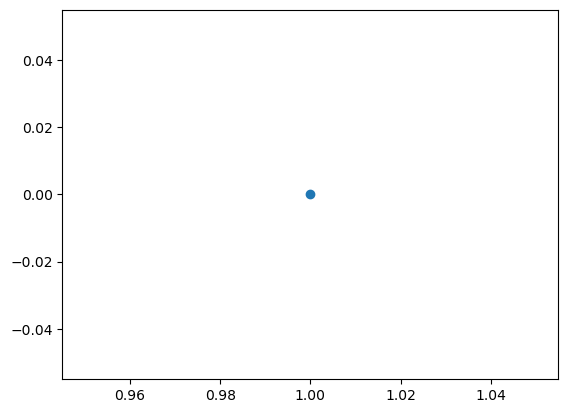

In [50]:
plt.scatter(y_test, y_test_predict)
plt.show()

### 보스턴 집값 데이터 읽고 결측 확인

In [51]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함
 
from sklearn.datasets import load_boston 
boston = load_boston() 
 
df = pd.DataFrame(boston.data, columns=boston.feature_names) 
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


/Users/min02choi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [52]:
df['MEDV'] = boston.target 

In [53]:
print( df.isnull().sum() )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 각 특징들 사이의 상관관계

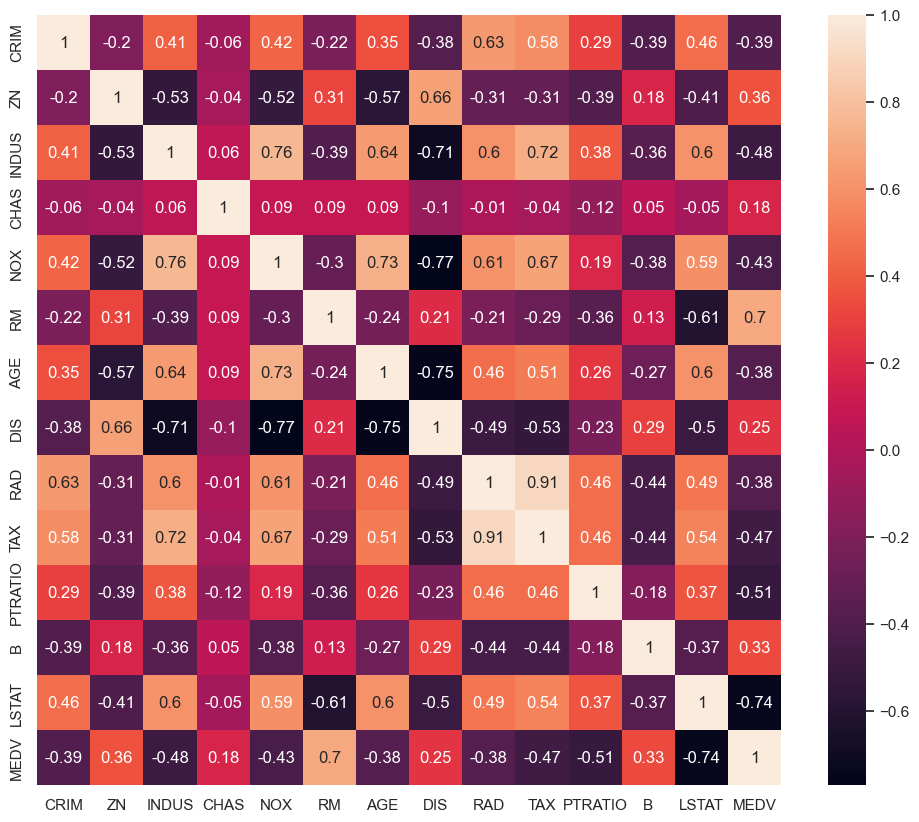

In [54]:
sns.set(rc={'figure.figsize':(12,10)}) 
correlation_matrix = df.corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True) 
plt.show()

### 어떤 특징들이 서로 상관관계가 있을까?

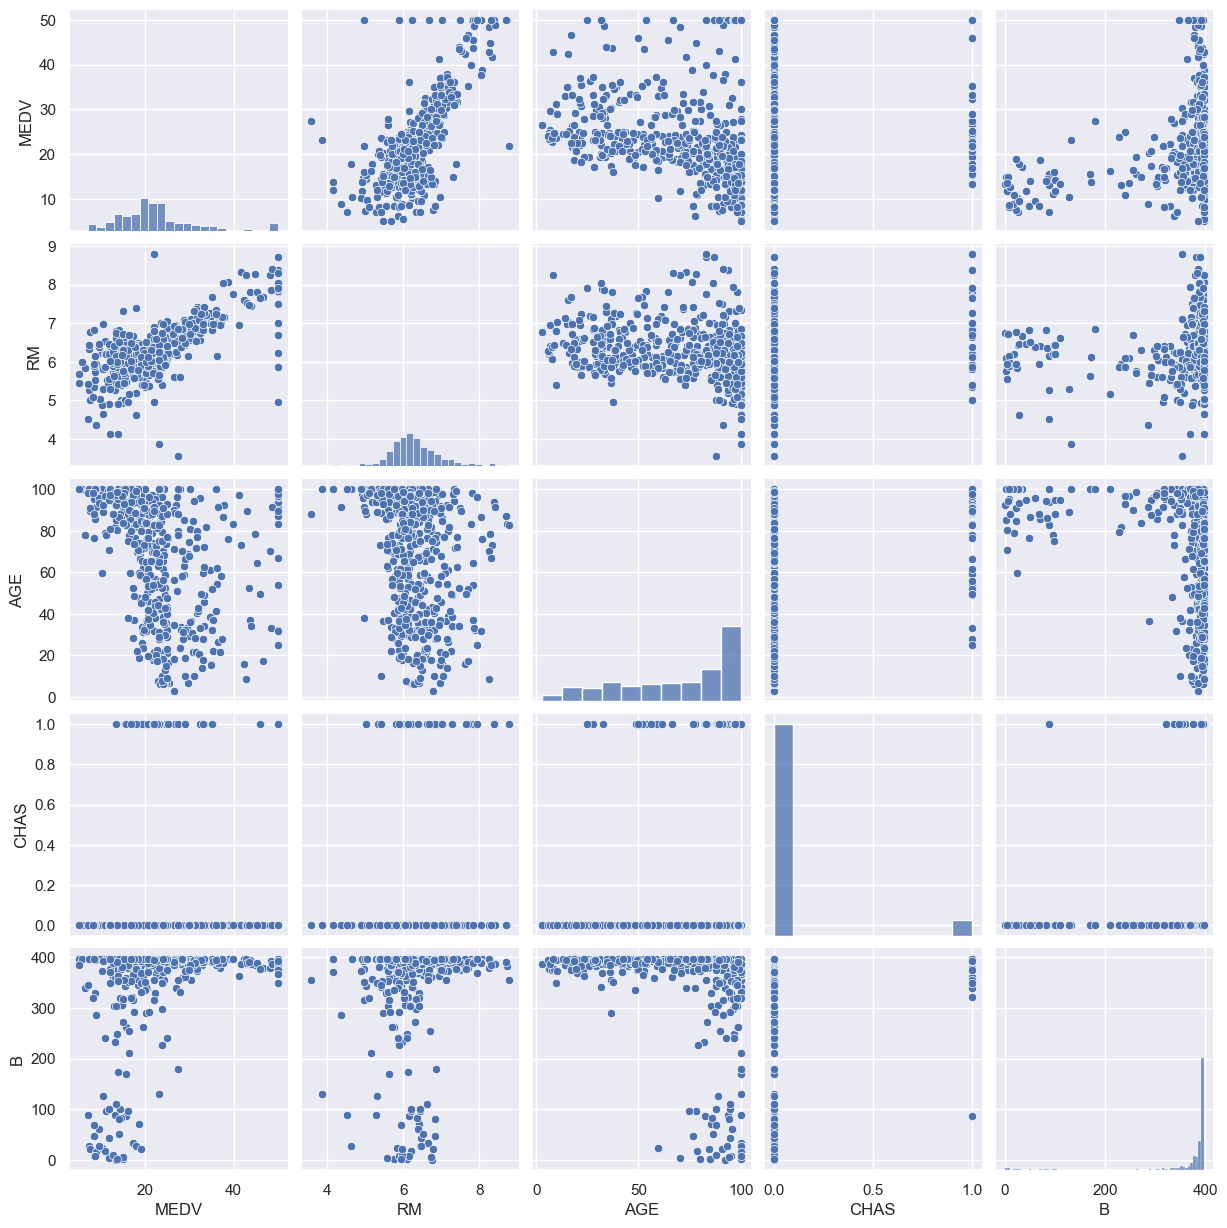

In [55]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS", "B"]])
plt.show()

### 간단한 회귀모델

In [56]:
X = df[['LSTAT', 'RM']] 
y = df['MEDV']

In [57]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 

lin_model = LinearRegression() 
lin_model.fit(X_train, y_train)

LinearRegression()

In [59]:
y_test_predict = lin_model.predict(X_test) 
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('RMSE =', rmse)

RMSE = 6.798223032016406
